In [2]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

sns.set() #Overrides matplotlib graph styles

In [3]:
df = pd.read_csv('/Users/jackcook/Documents/Course notes/Data Sources/1.01. Simple linear regression (1).csv')

## Inspect

In [4]:
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [5]:
df.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


## Prep

In [6]:
y = df.GPA
x1 = df.SAT

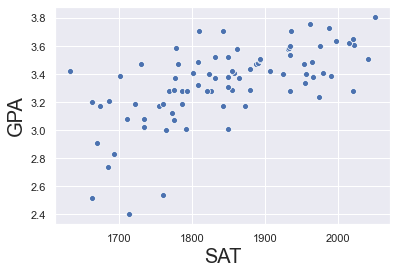

In [8]:
sns.scatterplot(x1,y)
plt.xlabel(x1.name,fontsize=20)
plt.ylabel(y.name,fontsize=20)
plt.show()

## Regression

In [20]:
x = sm.add_constant(x1) #Adds b constant to dataset
results = sm.OLS(y,x).fit() #Fits using specific technique (ordinary least squares)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sat, 08 Feb 2020   Prob (F-statistic):           7.20e-11
Time:                        12:04:03   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpreting the table 

Coef: intercept (Constant) and gradient (for SAT)

P>|t|: p value for hypothesis that constant is not zero (for intercept, in this case 0.503 means it is not significantly different from 0) and predictive importance (SAT). In this case SAT is highly predictive (p value 0.000!)

OLS - ordinary least squares, minimise SSE (see below)

### Decomposing variability

SST/TSS - Sum of Squares Total, total variability of dataset. Sum of (y - ybar)^2

SSR - Sum of Squares Regression, measures explained variability by your line. If SSR = SST your line explains all variance within dataset. Sum of (yhat - ybar)^2. Also known as ESS (Explained Sum of Squares).

SSE - Sum of Squares Error, measures unexplained variability by the regression. Sum of (y - yhat)^2. Also known as RSS (Residual Sum of Squares)

SST (actual distance from mean, total variability) - SSR (predicted distance from mean, explained variability) = SSE (actual distance from predicted distance, unexplained variability)

R squared = SSR / SST, value between 0 and 1. eg 0.401 = 40.1% of variability explained by constant.